In [60]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)

In [4]:
df = pd.read_csv("HY_Universe_corporate bond.csv")
df.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


## Data set size and statistic value

In [5]:
print("Number of Columns :", len(df.columns))
print("Number of Rows :", len(df))

Number of Columns : 37
Number of Rows : 2721


## Attributes datatype
*** using `apply` function is a quicker way to count datatype of the columns

In [6]:
def get_data_type(x):
    return type(x).__name__

result = df.applymap(get_data_type)

counts = result.apply(pd.value_counts)
counts.fillna(0,inplace=True)
df_melted = df.melt(var_name='columns', value_name='values')

counts = counts.T
counts

,float,int,str
CUSIP,0.0,0.0,2721.0
Ticker,0.0,0.0,2721.0
Issue Date,0.0,0.0,2721.0
Maturity,0.0,0.0,2721.0
1st Call Date,0.0,0.0,2721.0
Moodys,0.0,0.0,2721.0
S_and_P,0.0,0.0,2721.0
Fitch,0.0,0.0,2721.0
Bloomberg Composite Rating,0.0,0.0,2721.0
Coupon,2721.0,0.0,0.0


## Statistical Summaries
*** built in function is pandas can provide quantile information and mean, std, count on all of the numeric columns

In [7]:
df.describe()

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
count,2721.000000,2.721000e+03,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,...,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,2721.000000
mean,10.307872,8.299295e+08,113.968997,18.218230,0.182182,2700.696435,7.222372e+08,5.361476e+05,5.255853e+05,316.581771,...,0.244306,0.676536,3.496141,0.379648,7.588325e+06,5.672609e+06,4.915523e+07,6.690499e+05,21.598988,2.471885
std,63.051382,5.802790e+08,101.893176,7.872071,0.078721,5572.262205,1.027825e+09,4.193546e+05,2.670677e+05,347.802629,...,0.152165,0.219661,1.712004,0.144545,8.979311e+06,7.340321e+06,6.703860e+07,3.094537e+06,32.901129,5.581749
min,0.000000,3.700000e+08,11.930000,4.388758,0.043888,1.000000,7.000000e+03,4.000000e+03,5.000000e+03,1.000000,...,0.000000,0.000000,1.000000,0.000000,7.000000e+03,7.000000e+03,7.000000e+03,1.400000e+01,1.000000,1.000000
25%,5.000000,5.000000e+08,65.170000,12.738630,0.127386,116.000000,6.189000e+07,7.500000e+04,3.010473e+05,45.000000,...,0.124731,0.534224,1.000000,0.290826,2.295273e+06,1.750000e+06,9.020000e+06,2.100000e+04,4.046154,1.000000
50%,6.250000,6.500000e+08,97.370000,16.538471,0.165385,674.000000,3.480000e+08,5.000000e+05,5.769231e+05,184.000000,...,0.250000,0.681992,5.000000,0.376385,4.926339e+06,3.527000e+06,2.410000e+07,1.060000e+05,10.821429,1.000000
75%,7.750000,1.000000e+09,121.770000,22.120108,0.221201,2467.000000,9.328420e+08,1.000000e+06,7.289650e+05,483.000000,...,0.356808,0.859256,5.000000,0.448718,9.649299e+06,7.011000e+06,6.370500e+07,4.300000e+05,24.526316,2.000000
max,999.000000,7.364026e+09,1217.570000,54.673908,0.546739,57935.000000,8.979960e+09,3.400000e+06,3.400000e+06,1667.000000,...,1.000000,1.000000,5.000000,1.000000,1.179500e+08,1.179500e+08,8.728140e+08,1.002500e+08,513.769231,160.000000


In case want 4-10 equal quantile using lambda function and apply funtion below

In [17]:
num_only_df = df.select_dtypes(include = [np.number]) # can only find the quantile only on numberic columns
def get_n_quantiles(series, n):
    quantiles = [series.quantile(q = i/n) for i in range(1,n+1)] # start at quantile 1 to n
    return pd.Series(quantiles, index=[f"Boundary for {int((i/n)*100)} percentile " for i in range(1, n+1)])

result = num_only_df.apply(lambda x: get_n_quantiles(x,10),axis=0) #using 10 equal quantiles
result 

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
Boundary for 10 percentile,2.95,4.000000e+08,59.83,9.769497,0.097695,17.0,1.000000e+07,25000.0,1.464936e+05,8.0,...,0.018868,0.406667,1.0,0.216903,1.209314e+06,1000000.0,3135000.0,6000.0,2.137931,1.0
Boundary for 20 percentile,4.63,4.900000e+08,61.00,12.003317,0.120033,71.0,3.881800e+07,50000.0,2.439469e+05,30.0,...,0.089202,0.500000,1.0,0.266286,1.948795e+06,1325000.0,7000000.0,15000.0,3.222222,1.0
Boundary for 30 percentile,5.25,5.000000e+08,80.20,13.552895,0.135529,195.0,9.519400e+07,103000.0,3.540662e+05,67.0,...,0.152913,0.565350,2.0,0.311340,2.702941e+06,2000000.0,11447000.0,30000.0,5.233083,1.0
Boundary for 40 percentile,5.75,5.450000e+08,87.00,14.941133,0.149411,387.0,2.035290e+08,288000.0,4.549415e+05,114.0,...,0.205308,0.622711,3.0,0.344774,3.679778e+06,2619500.0,17132000.0,64000.0,7.625000,1.0
Boundary for 50 percentile,6.25,6.500000e+08,97.37,16.538471,0.165385,674.0,3.480000e+08,500000.0,5.769231e+05,184.0,...,0.250000,0.681992,5.0,0.376385,4.926339e+06,3527000.0,24100000.0,106000.0,10.821429,1.0
Boundary for 60 percentile,6.83,7.500000e+08,105.20,18.497367,0.184974,1069.0,5.377080e+08,800000.0,6.528628e+05,290.0,...,0.294196,0.761905,5.0,0.402390,6.349368e+06,4654000.0,34256000.0,200000.0,14.685185,1.0
Boundary for 70 percentile,7.50,9.000000e+08,121.70,20.496990,0.204970,1895.0,7.668432e+08,1000000.0,7.031048e+05,414.0,...,0.335417,0.824483,5.0,0.431818,8.214144e+06,6046500.0,51750000.0,300000.0,20.361538,2.0
Boundary for 80 percentile,8.13,1.015646e+09,121.87,23.849690,0.238497,3451.0,1.149906e+09,1000000.0,7.540576e+05,567.0,...,0.381471,0.888889,5.0,0.472381,1.109048e+07,8420000.0,80100000.0,600000.0,29.370370,2.0
Boundary for 90 percentile,9.38,1.500000e+09,127.43,28.822059,0.288221,7277.0,1.875356e+09,1000000.0,8.333333e+05,824.0,...,0.445031,0.948529,5.0,0.531532,1.686244e+07,12640000.0,128339000.0,1228000.0,50.416268,4.0
Boundary for 100 percentile,999.00,7.364026e+09,1217.57,54.673908,0.546739,57935.0,8.979960e+09,3400000.0,3.400000e+06,1667.0,...,1.000000,1.000000,5.0,1.000000,1.179500e+08,117950000.0,872814000.0,100250000.0,513.769231,160.0


In [44]:
#finding count and unique values
coupon_type_series = df['Coupon Type']
print("Unique lable in Coupon type")
print(coupon_type_series.value_counts().index.to_list())
print("Coupon type & count")
print(coupon_type_series.value_counts())

Unique lable in Coupon type
['FIXED', 'DEFAULTED', 'FLOATING', 'VARIABLE', 'EXCHANGED', 'PAY-IN-KIND', 'FLAT TRADING', 'ZERO COUPON', 'STEP CPN', 'FUNGED']
Coupon type & count
FIXED           2139
DEFAULTED        184
FLOATING         124
VARIABLE         111
EXCHANGED        102
PAY-IN-KIND       41
FLAT TRADING       7
ZERO COUPON        7
STEP CPN           4
FUNGED             2
Name: Coupon Type, dtype: int64


## Q-Q plot
showing if the data is gaussian

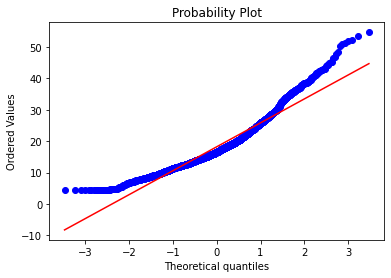

LiquidityScore does not look Gaussian (reject H0)


In [56]:
def p_test(p,alpha):
    if p > alpha:
        print("LiquidityScore looks Gaussian (fail to reject H0)")
    else:
        print("LiquidityScore does not look Gaussian (reject H0)")

stats.probplot(df['LiquidityScore'],dist='norm',plot=plt)
plt.show()
#using shapiro test for normal
stat, p = stats.shapiro(df['LiquidityScore'])
p_test(p,0.5)


## Visualizing Data Properties

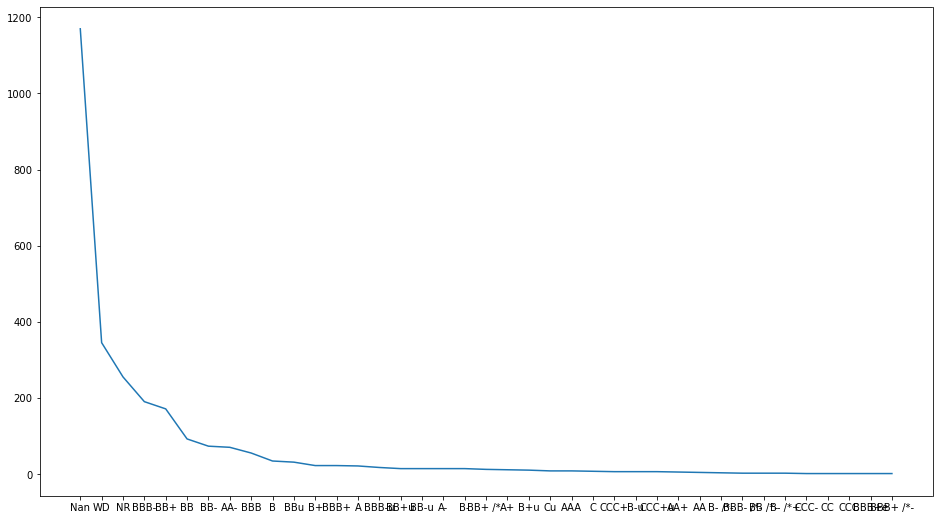

In [67]:
# line plot
plt.plot(df['Fitch'].value_counts())
plt.show()

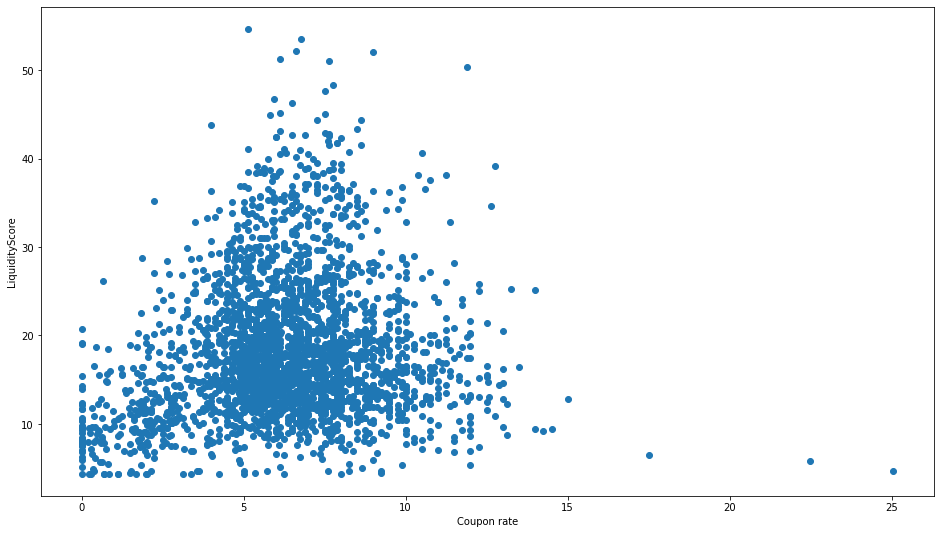

In [76]:
# Cross ploting Liquidity score - coupon rate
clean_df = df.loc[df['Coupon'] <= 100] # clean data that coupon rate if more than 100
plt.scatter(clean_df['Coupon'],clean_df['LiquidityScore'])
plt.xlabel("Coupon rate")
plt.ylabel("LiquidityScore")
plt.show()

## Target-attribute cross-plot

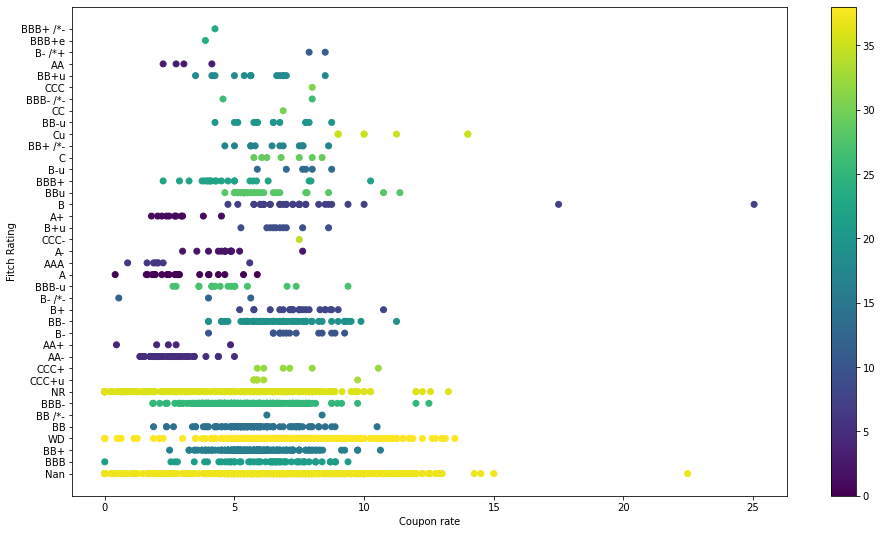

In [81]:
# target is rating by Fitch using coupon rate and liquidity score

fig, ax = plt.subplots()
scatter = ax.scatter(clean_df['Coupon'], clean_df['Fitch'], c=clean_df['Fitch'].astype("category").cat.codes, cmap='viridis')
ax.set_xlabel('Coupon rate')
ax.set_ylabel('Fitch Rating')
fig.colorbar(scatter)
plt.show()

## Correlation Matrix
** sebon plot is better for ploting correlation matrix since we see the attribute and the correlation associsate to it

<AxesSubplot:>

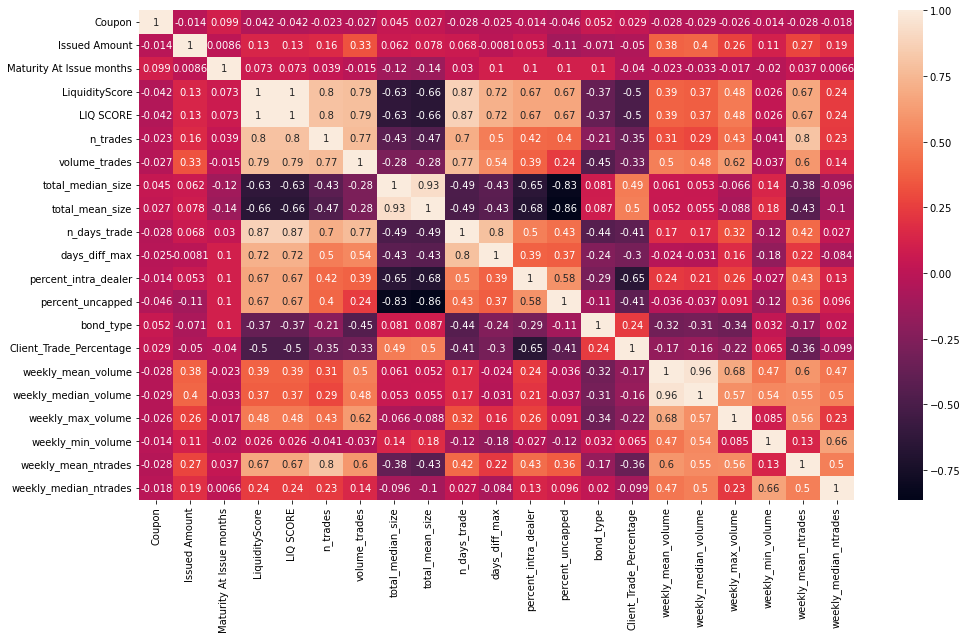

In [86]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True)


In [ ]:
print("My name is Saranpat Prasertthum")
print("My NetID is: 655667271")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Saranpat Prasertthum
My NetID is: 655667271
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
